In [1]:
import torch
torch.cuda.is_available()

True

In [3]:
from PIL import Image 
import requests
from transformers import SamModel, SamProcessor

device = "cuda" if torch.cuda.is_available() else "cpu"
print("device: ", device)

model = SamModel.from_pretrained("facebook/sam-vit-base").to(device)
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

# img_url = "https://huggingface.co/ybelkada/segment-anything/resolve/main/assets/car.png"
# raw_image = Image.open(requests.get(img_url, stream=True).raw).convert("RGB")
# Replace this with the path to your local image
image_path = "/home/ammara/Documents/golf/notebooks/door_1.jpg"

# Open the image from the local file system
raw_image = Image.open(image_path).convert("RGB")

input_points = [[[450, 600]]]  # 2D location of a window in the image

inputs = processor(raw_image, input_points=input_points, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**inputs)

masks = processor.image_processor.post_process_masks(
    outputs.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu()
)
scores = outputs.iou_scores

device:  cuda


In [4]:
# type(raw_image)
raw_image.size

(384, 677)

In [5]:
mask = masks[0][0].cpu().numpy()
mask.shape

(3, 677, 384)

In [6]:
mask = masks[0][0].cpu().numpy()
if mask.ndim == 3:
    mask = mask[0]  # Select the first channel if it's a 3D array

In [7]:
mask.shape

(677, 384)

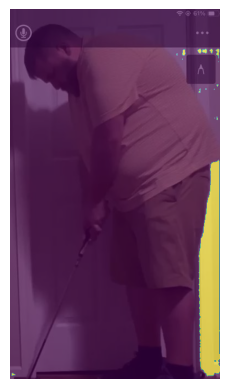

In [8]:
import matplotlib.pyplot as plt 

plt.imshow(raw_image)
plt.imshow(mask, alpha=0.6)
plt.axis('off')
plt.show()

In [9]:
type(mask)

numpy.ndarray

In [12]:
def get_image_center(image):
    height, width = image.size[:2]
    center_y = height // 2
    center_x = width // 2
    return center_x, center_y

# Calculate the center point
center_x, center_y = get_image_center(raw_image)
print(f"Image center: ({center_x}, {center_y})")

# Create the input_points with the center point
input_points = [[[float(center_x), float(center_y)]]]
print("Input points:", input_points)

Image center: (338, 192)
Input points: [[[338.0, 192.0]]]


In [13]:
raw_image.size

(384, 677)

In [15]:
image_path = "/home/ammara/Documents/golf/notebooks/door_1.jpg"

# Open the image from the local file system
raw_image = Image.open(image_path).convert("RGB")

# input_points = [[[450, 600]]]  # 2D location of a window in the image

inputs = processor(raw_image, input_points=input_points, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**inputs)

masks = processor.image_processor.post_process_masks(
    outputs.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu()
)
scores = outputs.iou_scores

In [16]:
mask = masks[0][0].cpu().numpy()
if mask.ndim == 3:
    mask = mask[0]  # Select the first channel if it's a 3D array

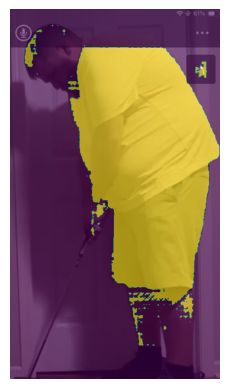

In [17]:
import matplotlib.pyplot as plt 

plt.imshow(raw_image)
plt.imshow(mask, alpha=0.6)
plt.axis('off')
plt.show()

In [18]:
# it is a binary mask 
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [19]:
mask.shape

(677, 384)

In [20]:
raw_image.size

(384, 677)